![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [6]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [7]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

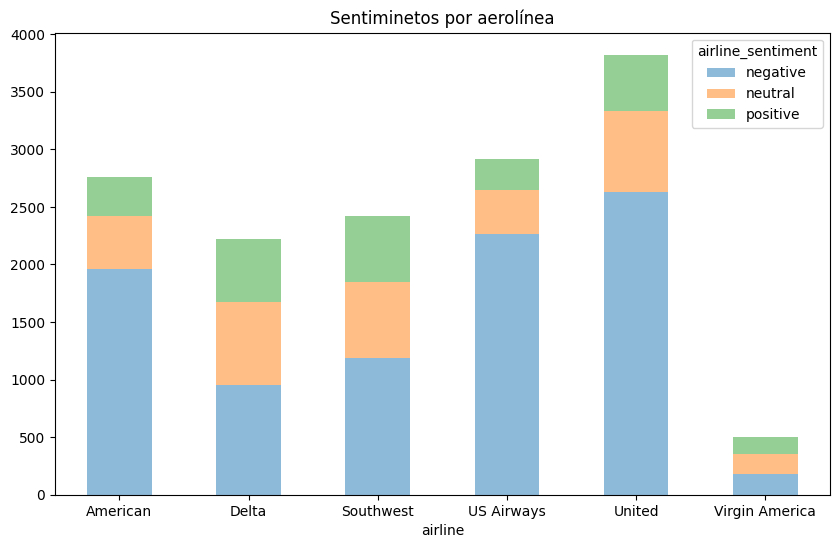

In [8]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 1
vectorizer = CountVectorizer(lowercase=False)

In [13]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [14]:
modelo = RandomForestClassifier(random_state=45)
modelo.fit(X_train_vectorized, y_train)

RandomForestClassifier(random_state=45)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(X_test_vectorized)
ac = accuracy_score(y_test, y_pred)
print("accuracy:", ac)

accuracy: 0.765521523178808


Teniendo en cuenta que solo se realiza la tokenización con limpieza de mayúsculas, y a partir de esto se realiza un RandomForestClasifier para clasificar cuando un comentario es negativo, neutral o positivo. El modelo arrojó un accuracy de 0.766. Lo que indica que el modelo clasifica adecuadamente el 76.6% de las observaciones. Esto sugiere que el modelo clasifica relativamente bien cuando un comentario es negativo, neutral o positivo.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
vect_no_stopw = CountVectorizer(stop_words='english')

In [16]:
X_train_vect_no_stopw = vect_no_stopw.fit_transform(X_train)
X_test_vect_no_stopw = vect_no_stopw.transform(X_test)

In [17]:
modelo_stopw = RandomForestClassifier(random_state=45)
modelo_stopw.fit(X_train_vect_no_stopw, y_train)

RandomForestClassifier(random_state=45)

In [18]:
y_pred_stopw = modelo_stopw.predict(X_test_vect_no_stopw)
ac_stopw = accuracy_score(y_test, y_pred_stopw)
print("accuracy:", ac_stopw)

accuracy: 0.7632450331125827


Se realiza la tokenización con eliminación de Stop Words, y a partir de esto se realiza un RandomForestClasifier para clasificar cuando un comentario de un pasajero es negativo, neutral o positivo. El modelo arrojo un accuracy de 0.763. Lo cual  indica que el modelo clasifica adecuadamente el 76,3% de las observaciones. Esto sugiere que al reducir las palabras más comúnes, el modelo logra capturar relativamente bien los sentimientos de las observaciones.

Considerando el modelo que se realizó en el punto anterior, solo emplear la limpieza con mayúsculas en el preprocesamiento, los resultados son bastantes similares, ligeramente peores en éste caso. 

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [20]:
# Definiicón de lista con vocabulario de la matriz de documentos
words = list(vect.vocabulary_.keys())[:100]

In [21]:
# Celda 3
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Santiago/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/Santiago/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

In [24]:
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)

In [25]:
X_train_lemas = vect_lemas.fit_transform(X_train)
X_test_lemas = vect_lemas.transform(X_test)

In [26]:
modelo_lemas = RandomForestClassifier(random_state=45)
modelo_lemas.fit(X_train_lemas, y_train)

RandomForestClassifier(random_state=45)

In [27]:
y_pred_lemas = modelo_lemas.predict(X_test_lemas)
ac_lemas = accuracy_score(y_test, y_pred_lemas)
print("accuracy:", ac_lemas)

accuracy: 0.7595198675496688


Se realiza la tokenización con la lematización de las palabras a su formal verbal, y a partir de esto se realiza un RandomForestClasifier para clasificar cuando un comentario es negativo, neutral o positivo. El modelo arrojo un accuracy de 0.759. Lo que indica que el modelo clasifica adecuadamente el 75,9% de las observaciones. La lematización está contribuyendo de manera efectiva a la comprensión y análisis de los comentarios de los pasajeros.

Considerando los modelos que se realizaron en los puntos anteriores, solo emplear la limpieza con mayúsculas en el preprocesamiento parece tener un mejor rendimiento en la tarea de clasificar cuando un comentario es negativo, neutral o positivo. Hasta el momento eliminar las stop words o realizar un proceso de lematización no parece mejor el desempeño del modelo, pero se encuentra dentro de un rango muy similar de rendimiento.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Celda 4
vect_mult = CountVectorizer(lowercase=False,stop_words='english', analyzer=split_into_lemmas )

In [29]:
X_train_mult = vect_mult.fit_transform(X_train)
X_test_mult = vect_mult.transform(X_test)

In [30]:
modelo_mult = RandomForestClassifier(random_state=45)
modelo_mult.fit(X_train_mult, y_train)

RandomForestClassifier(random_state=45)

In [31]:
y_pred_mult = modelo_mult.predict(X_test_mult)
ac_mult = accuracy_score(y_test, y_pred_mult)
print("accuracy:", ac_mult)

accuracy: 0.7595198675496688


Se realiza la tokenización utilizando las múltiples técnicas aquí trabajadas, es decir, se eliminan las stop words y se realiza lematización reduciendo a su forma verbal las palabras dentro de los comentarios de los pasajeros. Luego se realiza un RandomForestClasifier para identificar cuando un comentario es negativo, neutral o positivo. Lo cual arrojo un accuracy de 0.759. Lo que indica que el modelo clasifica adecuadamente el 75,9% de los comentarios de los pasajeros. Esto sugiere que el modelo clasifica relativamente bien cuando un comentario es negativo, neutral o positivo.

Para este ejercicio en especifico no parece tener mejoras significativas el usar al tiempo todas las tecnicas de preprocesamiento de textos. De hecho se obtuvo un resultado similar al solo aplicar la lematización verbal.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

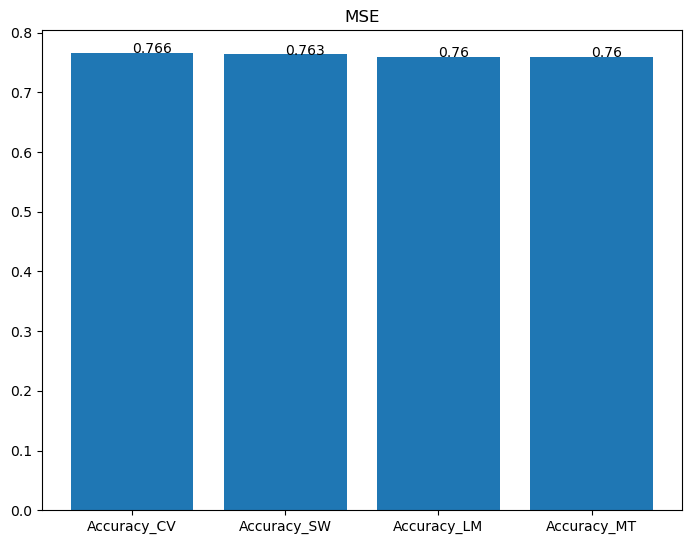

In [32]:
# Celda 5
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE")
ejeX = ['Accuracy_CV', 'Accuracy_SW','Accuracy_LM', 'Accuracy_MT']
ejeY = [ac,ac_stopw,ac_lemas,ac_mult]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

Finalmente al comparar el accuracy de los 4 modelos realizados, se tiene que el modelo que se realizó solo limpiando las mayúsculas del texto tiene el mejor accuracy. El accuracy para este caso es de aproximadamente 0.766, lo que indica que el modelo clasifica relativamente bien cuando un comentario es malo, neutro o bueno. Clasificando bien el 76,6% de las observaciones. 

Es imperante señalar que las diferencias del accuracy entre los distintos modelos son casi nulas, desde esa perspectiva cualquier modelo parece ser un modelo relativamente bueno para realizar la tarea de análisis de sentimiento. 